<a href="https://colab.research.google.com/github/Pareek-Yash/Titanic-Machine-Learning-from-Disaster/blob/main/Titanic_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Data Visualization

In [ ]:
! pip install -q kaggle

In [ ]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [1]:
! cp kaggle.json ~/.kaggle/

In [2]:
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import numpy as np 
import pandas as pd

from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [5]:
path_to_zip_file = "/content/titanic.zip"
directory_to_extract_to = 'kaggle/titanic/'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [6]:
train = pd.read_csv('/content/kaggle/titanic/train.csv')
test = pd.read_csv('/content/kaggle/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's now look at some interesting correlations between data.
And find out who these passengers were.

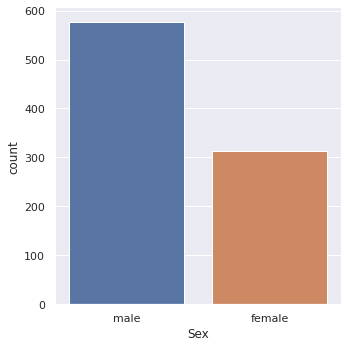

In [7]:
sns.catplot(x='Sex',data=train,kind='count')

Shows the male count was much more significant than the female count. 

Now let's find out the classes these people boarded

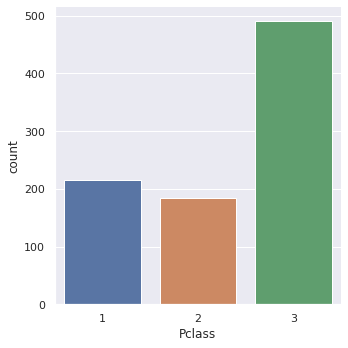

In [8]:
sns.catplot(x='Pclass',data=train,kind='count')

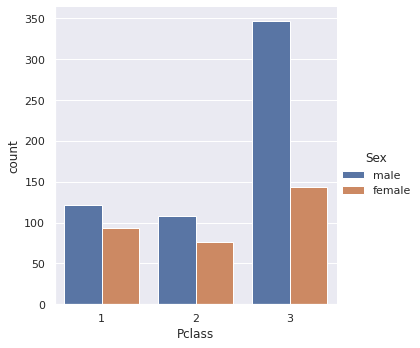

In [9]:
#Let's see the male to female ration in all classes
sns.catplot(x='Pclass',data=train, hue='Sex',kind='count')

But this still doesn't show how many were below 18 in titanic and nor will it tell how many survived.

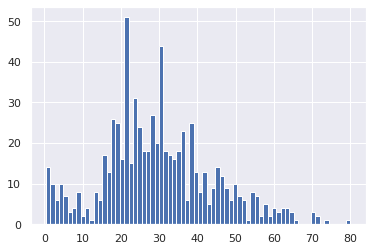

In [10]:
#Now let us look at the ages of the passengers

train['Age'].hist(bins=70)

There is considerable population under the age of 18

In [11]:
def undrage_count(passenger):
    
    age , sex = passenger
    if age < 18:
        return 'child'
    else:
        return sex

train['person'] = train[['Age','Sex']].apply(undrage_count,axis=1)

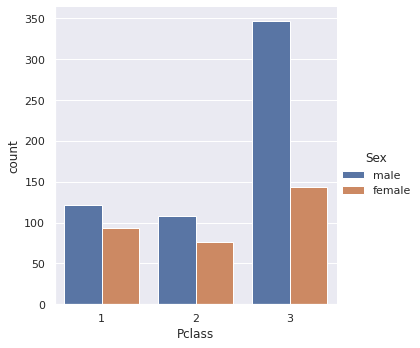

In [12]:
sns.catplot(x='Pclass',data=train, hue='Sex',kind='count')

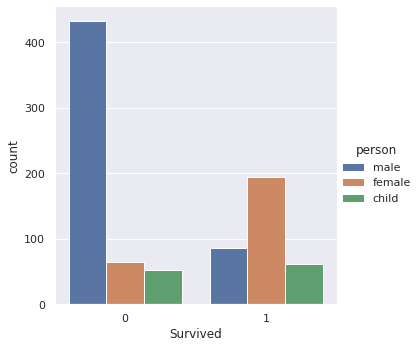

In [13]:
sns.catplot(x='Survived',data=train, hue='person',kind='count')

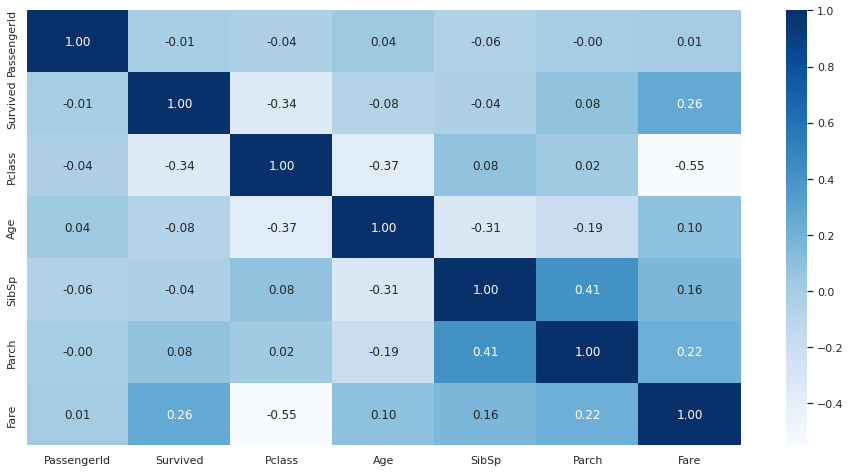

In [14]:
plt.figure(figsize= (16, 8))
sns.heatmap(train.corr(), annot = True, cmap= 'Blues', fmt= '.2f');

Well for further analysis it's better to drop some irrelevant classes

## Cleaning data

In [15]:
train_1 = train.drop(['PassengerId', 'Fare', 'Name', 'Ticket', 'Cabin'], axis= 1)

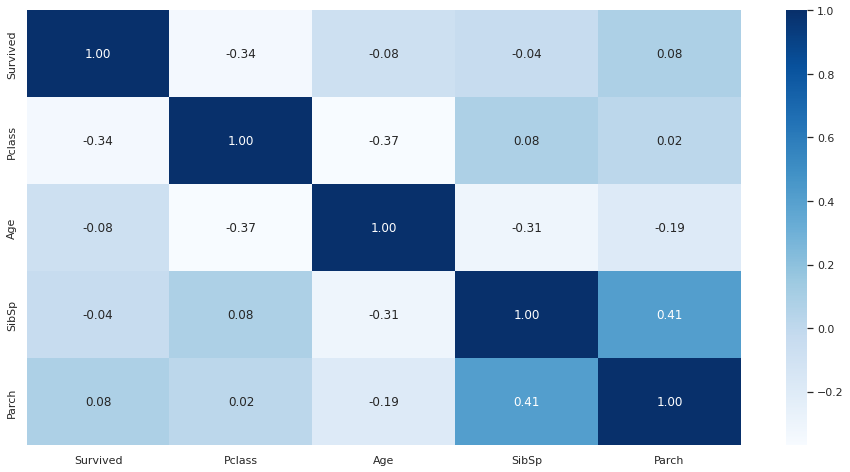

In [16]:
plt.figure(figsize= (16, 8))
sns.heatmap(train_1.corr(), annot = True, cmap= 'Blues', fmt= '.2f');

This was just a glance at the data. We will dive deeper next with more EDA.

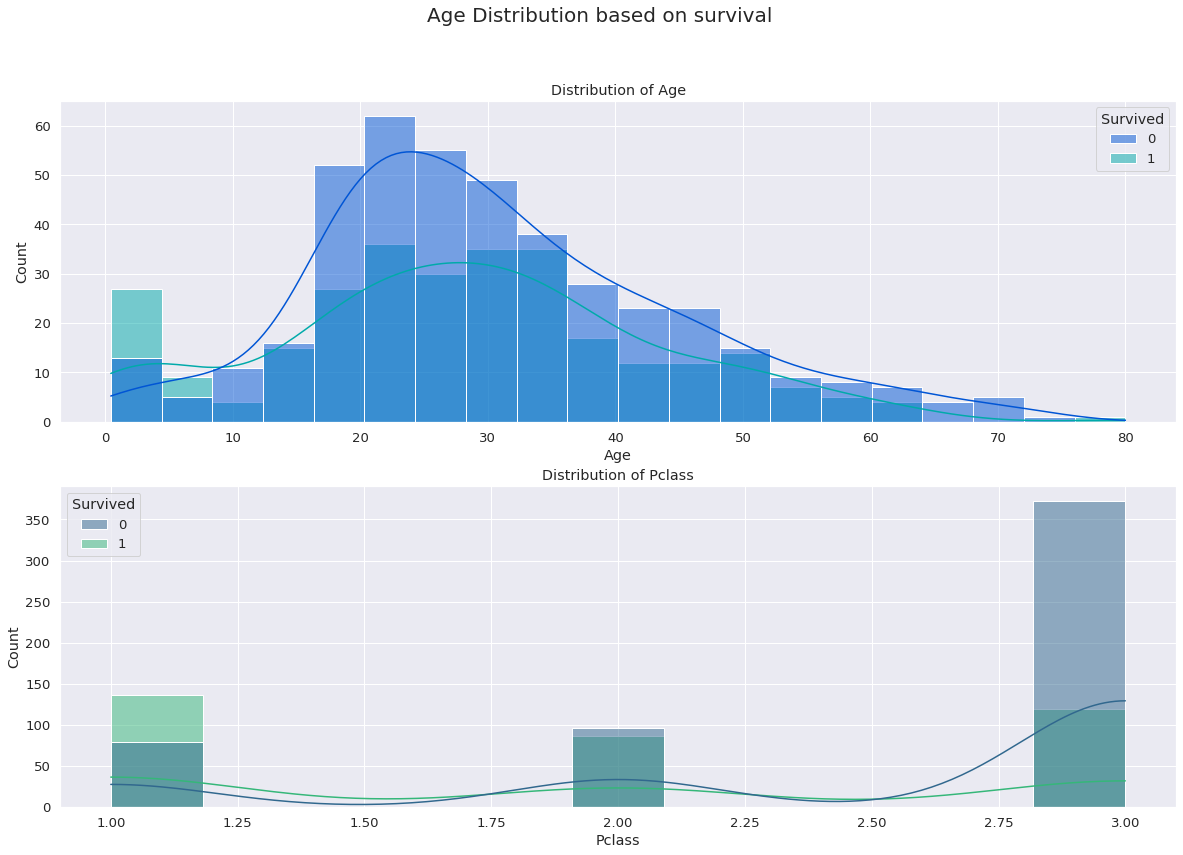

In [27]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, figsize = (20, 13))

plt.suptitle('Age Distribution based on survival', fontsize = 20)

ax1 = sns.histplot(x ='Age', data= train, hue= 'Survived', kde= True, ax= ax[0], palette= 'winter')
ax1.set(xlabel = 'Age', title= 'Distribution of Age')

ax2 = sns.histplot(x ='Pclass', data= train, hue= 'Survived', kde= True, ax= ax[1], palette= 'viridis')
ax2.set(xlabel = 'Pclass', title= 'Distribution of Pclass')

plt.show()